In [9]:
%run my_imports.py

# Figure on jupyter notebook
%matplotlib inline

# Automatically reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
folder_selected = r'D:\DataSet\MySpaces\data'
# power = loading_from_listfolder(folder_selected,'ERDS_phase_coupling_data') # for ERDS method

agency_subjects = loading_from_listfolder(folder_selected,'agency_dict') # for BandPower method

chan = pickle.load(open(r'D:/DataSet/MySpaces/data/s05/epochs_ERDS','rb'))
chan = chan.ch_names

var2Load = r"D:/results/Results_ANS/subjectFolderExperiment/s03\epochs_ERDS"
info_chan = pickle.load(open(var2Load,'rb')).info

folderGA = os.path.join(folder_selected,'GA')

if not os.path.exists(folderGA):
    os.makedirs(folderGA)
    print('**** Create Grand Average folder ****')
else:
    print('**** Grand Average folder exists already ****')

D:\DataSet\MySpaces\data\pilot_giulia
D:\DataSet\MySpaces\data\pilot_michele
D:\DataSet\MySpaces\data\pilot_nico
D:\DataSet\MySpaces\data\pilot_nicolas
D:\DataSet\MySpaces\data\s05
D:\DataSet\MySpaces\data\s06
D:\DataSet\MySpaces\data\s07
D:\DataSet\MySpaces\data\s08
D:\DataSet\MySpaces\data\s09
D:\DataSet\MySpaces\data\s10
D:\DataSet\MySpaces\data\s12
D:\DataSet\MySpaces\data\s13
D:\DataSet\MySpaces\data\s14
D:\DataSet\MySpaces\data\s15
**** Grand Average folder exists already ****


In [ ]:
for iSubject,agency_ in enumerate(agency_subjects):
     df_agency = pd.DataDrame(agency_)

In [41]:
subjects_agency_dict = dict()
subjects_agency_dict_mean = dict()
for iEvent,event_type in enumerate(agency_subjects[0].keys()):
    print(event_type)
    mean_agency = []
    agency_event_all = []
    for iSubject,agency_ in enumerate(agency_subjects):
        agency_event = agency_[event_type]
        agency_event_all.append(agency_event)
        mean_agency.append(np.median(agency_event))  
    subjects_agency_dict.update({event_type:np.concatenate(agency_event_all)})
    subjects_agency_dict_mean.update({event_type:mean_agency})

SELF_Yes
SELF_No
CUE_Yes
CUE_No


SELF_Yes
-17.13026947734878
SELF_No
-14.389111970034367
CUE_Yes
-17.427036799870447
CUE_No
-15.48729303081743


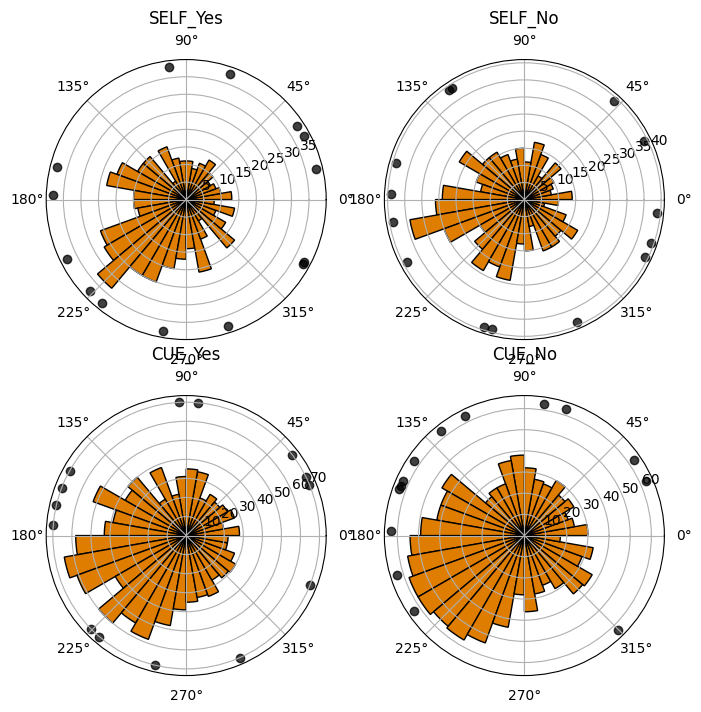

In [47]:
colormap = [0.8706,0.4902,0];

fig = plt.figure(figsize=(8, 8))
plt.style.use('default')
path = os.path.join(folderGA,'Agency_YesNo')
bin_size = 10
i = 0
for key,items in subjects_agency_dict.items():
    print(key)
    ax = fig.add_subplot(221 + i, projection='polar')
    ax.set_theta_zero_location("E")
    ax.set_title(key, y=1.1)
    degrees =items
    print(np.mean(degrees))
    a , b=np.histogram(degrees, bins=np.arange(-180, 180+bin_size, bin_size))
    
    centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
    ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color=colormap, edgecolor='k',label=key)
    
    degrees = subjects_agency_dict_mean[key]
    r = (np.max(a)+5)*np.ones(len(degrees))
    ax.scatter(degrees, r,color='k',cmap='hsv', alpha=0.75)  
    i = i+1
event_type = "Agency_YesNo" 
saving_figure(event_type,path,fig)